## Imports

In [224]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [225]:
df = pd.read_csv('hipparcos-voidmain.csv')

In [226]:
df.head(15)

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.10,-0.01,0.01,0.34,0.0,0.74,1,9.643,0.020,9.130,0.019,NaN,0.482,0.025,T,0.55,0.03,L,NaN,9.2043,0.0020,0.017,87.0,NaN,9.17,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,NaN,0.999,0.002,G,1.04,0.00,I,NaN,9.4017,0.0017,0.015,120.0,NaN,9.37,9.44,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,NaN,-0.019,0.004,G,0.00,0.00,H,NaN,6.6081,0.0007,0.008,127.0,NaN,6.60,6.62,NaN,C,NaN,NaN,00000+3852,I,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.20,0.08,0.18,0.08,-0.31,-0.18,0.0,-1.46,4,8.471,0.007,8.092,0.007,NaN,0.370,0.009,T,0.43,0.01,L,NaN,8.1498,0.0011,0.015,201.0,NaN,8.12,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.10,0.24,0.06,0.26,-0.10,0.20,-0.16,-0.30,-0.19,0.06,0.0,-1.24,5,9.693,0.014,8.656,0.010,NaN,0.902,0.013,T,0.90,0.01,L,NaN,8.7077,0.0018,0.019,161.0,NaN,8.68,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2
5,H,6,NaN,00 00 04.35,+03 56 47.4,12.31,NaN,G,0.018141,3.946489,NaN,18.80,226.29,-12.84,4.03,2.18,4.99,6.15,3.20,0.35,-0.01,0.03,-0.11,-0.02,0.47,-0.02,0.03,0.31,0.35,4.0,2.95,6,NaN,NaN,NaN,NaN,NaN,1.336,0.020,G,1.55,0.03,I,NaN,12.4488,0.0085,0.091,87.0,NaN,12.30,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,1.55,M0V:,S
6,H,7,NaN,00 00 05.41,+20 02 11.8,9.64,NaN,G,0.022549,20.036602,NaN,17.74,-208.12,-200.79,1.01,0.79,1.30,1.13,0.82,0.32,0.08,-0.02,-0.04,0.12,0.06,0.11,0.00,0.16,0.43,0.0,0.21,7,10.542,0.039,9.679,0.030,NaN,0.740,0.020,G,0.79,0.02,H,NaN,9.6795,0.0021,0.017,104.0,NaN,9.65,9.72,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B+19 5185,NaN,NaN,0.79,G0,S
7,H,8,NaN,00 00 06.55,+25 53 11.3,9.05,3.0,H,0.027292,25.886474,NaN,5.17,19.09,-5.66,1.70,0.93,1.95,1.54,0.88,0.27,-0.66,-0.36,-0.38,-0.12,0.36,-0.21,-0.24,0.32,0.18,0.0,0.98,8,10.433,0.055,9.151,0.029,NaN,1.102,0.051,T,3.92,0.39,O,NaN,8.5522,0.1671,1.460,77.0,NaN,7.15,11.25,327.5,P,1.0,B,NaN,NaN,NaN,1.0,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,P,224709.0,B+25 5054,NaN,NaN,4.82,M6e-M8.5e Tc,G
8,H,9,NaN,00 00 08.48,+36 35 09.4,8.59,NaN,H,0.035342,36.585938,NaN,4.81,-6.30,8.42,0.86,0.55,0.99,1.02,0.65,0.03,0.16,-0.01,0.00,0.07,-0.02,0.08,0.04,0.10,0.13,3.0,-1.26,9,9.962,0.025,8.711,0.015,NaN,1.067,0.023,T,1.03,0.02,L,NaN,8.7534,0.0018,0.014,107.0,NaN,8.73,8.78,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224708.0,B+35 5149,NaN,NaN,1

In [227]:
df.columns.dtype


dtype('O')

## Dropping the nulls and making the target variable a binary column and make a copy of the dataset so that we have an unchanged base to refer to.

In [228]:
df=df.dropna(subset = ['HvarType'])

In [229]:
df['HvarType'].unique()

array(['C', 'P', 'D', 'U', 'R', 'M'], dtype=object)

In [230]:
df_2 = df.copy()

In [231]:
df_2.loc[df_2['HvarType'].isin(['P', 'D', 'U', 'R', 'M']), 'HvarType'] = 'S'

In [232]:
# df.loc[df['HvarType'].isin(['P', 'D', 'U', 'R', 'M']), 'HvarType'] = 'S'

In [233]:
X = df_2.drop(columns='HvarType')
y = df_2['HvarType']

In [234]:
df_2['HvarType'].value_counts()

C    46552
S    25070
Name: HvarType, dtype: int64

### Train test split, created preprocessor for our pipeline, created a list of only columns with numarical values.

In [235]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [236]:
preprocessor = ColumnTransformer([
    ('SimpleImputer', SimpleImputer(strategy='median'), )
])

In [237]:
catCols = [col for col in x_train.columns if x_train[col].dtype in ['object']]
len(catCols)

26

In [238]:
numCols = [col for col in x_train.columns if x_train[col].dtype in ['int64', 'float64']]
len(numCols)

51

In [239]:
len(numCols) + len(catCols)

77

#### Label encode to target; S(some type of varible) = 1 , C(not varible) = 0

In [241]:
lE = LabelEncoder()
lE.fit(y)
y_train = lE.transform(y_train)
y_test = lE.transform(y_test)

### Created a pipeline to use in a for loop that gets the accuracy, recall, f1-score, and roc-auc for every numarical column. 

In [242]:
lg = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('model',LogisticRegression(max_iter=5000, random_state=42))
    ])
# lg.fit(x_train[['HIP']], y_train)

In [243]:
pd.Series(y_train).value_counts()

0    34938
1    18778
dtype: int64

In [244]:
used_num_cols = []
for col in numCols:
    lg = Pipeline(steps=[
        ('SimpleImputer', SimpleImputer(strategy='median')),
        ('model', LogisticRegression(max_iter=5000, random_state=42))  
    ])
    lg.fit(x_train[[col]], y_train)
    train_preds = lg.predict(x_train[[col]])
    test_preds = lg.predict(x_test[[col]])
    train_probs = lg.predict_proba(x_train[[col]])[:,1]
    test_probs = lg.predict_proba(x_test[[col]])[:,1]
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds, zero_division=0)
    test_recall = recall_score(y_test, test_preds, zero_division=0)
    train_precision = precision_score(y_train, train_preds, zero_division=0)
    test_precision = precision_score(y_test, test_preds, zero_division=0)
    train_f1 = f1_score(y_train, train_preds, zero_division=0)
    test_f1 = f1_score(y_test, test_preds, zero_division=0)
    train_rocauc = roc_auc_score(y_train, train_probs)
    test_rocauc = roc_auc_score(y_test, test_probs)
    print(col)
    if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
        used_num_cols.append(col)
        print(f'{col} added to used column list')
    print(F'\nTrain Accuracy:\t\t{train_accuracy}')
    print(F'Test Accuracy:\t\t{test_accuracy}')
    print(F"\nTrain Recall:\t\t{train_recall}")
    print(F'Test Recall:\t\t{test_recall}')
    print(F"\nTrain Precision:\t{train_precision}")
    print(F'Test Precision:\t\t{test_precision}')
    print(F"\nTrain f1:\t\t{train_f1}")
    print(F'Test f1:\t\t{test_f1}')
    print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
    print(F'Test ROC-AUC:\t\t{test_rocauc}')
    print('\n')
    print("****"*20)
    print('\n')

HIP

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.49096253710321636
Test ROC-AUC:		0.49019535851846385


********************************************************************************


Vmag
Vmag added to used column list

Train Accuracy:		0.6512770869014819
Test Accuracy:		0.6497263487099296

Train Recall:		0.0025029289594205987
Test Recall:		0.003178639542275906

Train Precision:	0.9791666666666666
Test Precision:		1.0

Train f1:		0.004993094656326358
Test f1:		0.0063371356147021544

Train ROC-AUC:		0.5400225289000143
Test ROC-AUC:		0.5422443083631775


********************************************************************************


VarFlag
VarFlag added to used column list

Train Accuracy:		0.7077034775485889
Test Accuracy:		0.7064112587959344

Train Recall:		0.16386196613057832
Test Recall:		0.16449459631277813

Train Precis

pmDE:Plx

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.506791572193668
Test ROC-AUC:		0.5105552782768369


********************************************************************************


pmDE:pmRA

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5054475750696237
Test ROC-AUC:		0.5073448632867517


********************************************************************************


F1
F1 added to used column list

Train Accuracy:		0.669707349765433
Test Accuracy:		0.6721210767340556

Train Recall:		0.17179678347001812
Test Recall:		0.1821360457724094

Train Precision:	0.595642540620384
Test Precision:		0.6125066809192945

Train f1:		0.26667768868314456
Test f1:		0.28077912532157295


Period
Period added to used column list

Train Accuracy:		0.6603991361977809
Test Accuracy:		0.6584385122305373

Train Recall:		0.02854404089892427
Test Recall:		0.027972027972027972

Train Precision:	1.0
Test Precision:		1.0

Train f1:		0.05550377964171067
Test f1:		0.054421768707483

Train ROC-AUC:		0.5000532538076473
Test ROC-AUC:		0.49952320406865863


********************************************************************************


moreVar
moreVar added to used column list

Train Accuracy:		0.6880259140665723
Test Accuracy:		0.6872556684910086

Train Recall:		0.10757269144743849
Test Recall:		0.10998092816274635

Train Precision:	1.0
Test Precision:		1.0

Train f1:		0.19424944706221753
Test f1:		0.1981672394043528

Train ROC-AUC:		0.5537863457237192
Test ROC-AUC:		0.5549904640813732


********************************************************************************


Nsys
Nsys added to used column list

Train Accuracy:		0.6859036413731476
Test Accuracy:		0.6862504188540154

Train 

In [245]:
logreg = LogisticRegression()
logreg.fit(x_train[[col]], y_train)
# x_train = logreg.transform(x_train[[col]])
# x_test = logreg.transform(x_test)

LogisticRegression()

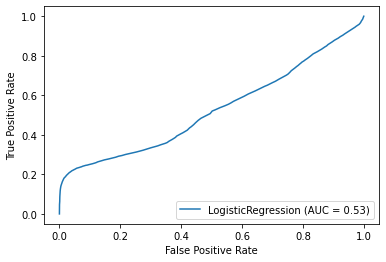

In [246]:
plot_roc_curve(logreg, x_train[[col]], y_train);

In [247]:
cv_results = cross_validate(logreg, x_train[[col]], y_train, scoring='roc_auc')
cv_results

{'fit_time': array([0.06834149, 0.08282518, 0.05365825, 0.04696202, 0.04616308]),
 'score_time': array([0.01983023, 0.01695299, 0.0109756 , 0.00997972, 0.01102066]),
 'test_score': array([0.52495686, 0.52862354, 0.5250517 , 0.52448274, 0.53008052])}

In [249]:
# cat_transformer = Pipeline(steps = [
#     ('cat_imputer', SimpleImputer(strategy='most_frequent')),
#     ('ohe', OneHotEncoder(handle_unknown='ignore'))
# ])

num_transformer = Pipeline(steps=[
        ('num_imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
#         ('tree', DecisionTreeClassifier(random_state=100, max_depth=5))
    ])

In [250]:
preprocessor = ColumnTransformer(transformers=[
    ('num_transformer', num_transformer, numCols),
    ('cat_transformer', cat_transformer, catCols)
])

In [251]:
dt = Pipeline(steps = [
    ('num_transformer', num_transformer),
    ('tree', DecisionTreeClassifier(random_state=100, max_depth=5))
])


In [ ]:
type(dt)

In [ ]:
x_train[numCols].head(3)

In [ ]:
y_train

In [252]:
dt.fit(x_train[numCols], y_train)

y_hat_test = dt.predict(x_test[numCols]) 

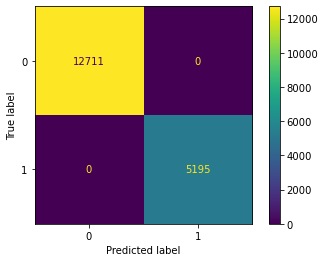

In [253]:
plot_confusion_matrix(dt, x_test[numCols], y_hat_test);


In [254]:
y_actual = df['HvarType']
y_pred_baseline = ['0'] * len(df)
accuracy_score(y_actual, y_pred_baseline)


0.0

In [47]:
for col in numCols:
    
    if len(df.loc[df[col] == np.inf]) > 1:
        print(col)

In [266]:
logreg = Pipeline(steps = [
    ('num_transformer', num_transformer),
    ('lg', LogisticRegression(random_state=42, max_iter=5000))
])


In [267]:
logreg.fit(x_train[numCols], y_train)
y_hat_test = logreg.predict(x_test[numCols]) 


# ax.set_xlabel('al')
# ax.set_ylabel('household glass type')
# ax.legend();

In [268]:
y_hat_test

array([1, 0, 0, ..., 0, 1, 0])

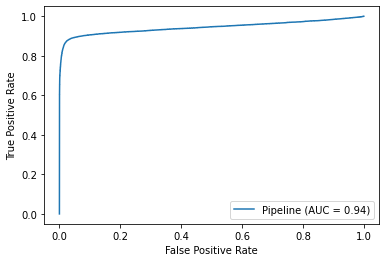

In [271]:
plot_roc_curve(logreg, x_train[numCols], y_train);

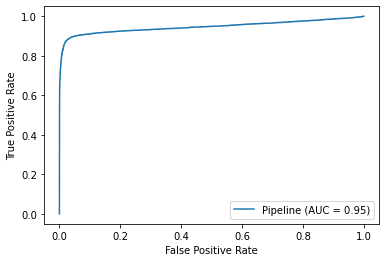

In [272]:
plot_roc_curve(logreg, x_test[numCols], y_test);

In [ ]:
0. Catalog ( Catalog_Name ) - Catalogue (H=Hipparcos) 
1. HIP ( HIP_Number ) - Identifier (HIP number) 
2. Proxy ( Prox_10asec ) - Proximity flag 
3. RAhms ( RA ) - RA in h m s, ICRS (J1991.25) 
4. DEdms ( Dec ) - Dec in deg ' ", ICRS (J1991.25) 
5. Vmag ( Vmag ) - Magnitude in Johnson V 
6. VarFlag ( Var_Flag ) - Coarse variability flag 
7. r_Vmag ( Vmag_Source ) - Source of magnitude 
8. RAdeg ( RA_Deg ) - RA in degrees (ICRS, Epoch-J1991.25) 
9. DEdeg ( Dec_Deg ) - Dec in degrees (ICRS, Epoch-J1991.25) 
10. AstroRef ( Astrom_Ref_Dbl ) - Reference flag for astrometry 
11. Plx ( Parallax ) - Trigonometric parallax 
12. pmRA ( pm_RA ) - Proper motion in RA 
13. pmDE ( pm_Dec ) - Proper motion in Dec 
14. e_RAdeg ( RA_Error ) - Standard error in RA*cos(Dec_Deg) 
15. e_DEdeg ( Dec_Error ) - Standard error in Dec_Deg 
16. e_Plx ( Parallax_Error ) - Standard error in Parallax 
17. e_pmRA ( pm_RA_Error ) - Standard error in pmRA 
18. e_pmDE ( pm_Dec_Error ) - Standard error in pmDE 
19. DE:RA ( Crl_Dec_RA ) - (DE over RA)xCos(delta) 
20. Plx:RA ( Crl_Plx_RA ) - (Plx over RA)xCos(delta) 
21. Plx:DE ( Crl_Plx_Dec ) - (Plx over DE) 
22. pmRA:RA ( Crl_pmRA_RA ) - (pmRA over RA)xCos(delta) 
23. pmRA:DE ( Crl_pmRA_Dec ) - (pmRA over DE) 
24. pmRA:Plx ( Crl_pmRA_Plx ) - (pmRA over Plx) 
25. pmDE:RA ( Crl_pmDec_RA ) - (pmDE over RA)xCos(delta) 
26. pmDE:DE ( Crl_pmDec_Dec ) - (pmDE over DE) 
27. pmDE:Plx ( Crl_pmDec_Plx ) - (pmDE over Plx) 
28. pmDE:pmRA ( Crl_pmDec_pmRA ) - (pmDE over pmRA) 
29. F1 ( Reject_Percent ) - Percentage of rejected data 
30. F2 ( Quality_Fit ) - Goodness-of-fit parameter 
31. --- ( HIP_Number_repeat ) - HIP number (repetition) 
32. BTmag ( BT_Mag ) - Mean BT magnitude 
33. e_BTmag ( BT_Mag_Error ) - Standard error on BTmag 
34. VTmag ( VT_Mag ) - Mean VT magnitude 
35. e_VTmag ( VT_Mag_Error ) - Standard error on VTmag 
36. m_BTmag ( BT_Mag_Ref_Dbl ) - Reference flag for BT and VTmag 
37. B-V ( BV_Color ) - Johnson BV colour 
38. e_B-V ( BV_Color_Error ) - Standard error on BV 
39. r_B-V ( BV_Mag_Source ) - Source of BV from Ground or Tycho 
40. V-I ( VI_Color ) - Colour index in Cousins' system 
41. e_V-I ( VI_Color_Error ) - Standard error on VI 
42. r_V-I ( VI_Color_Source ) - Source of VI 
43. CombMag ( Mag_Ref_Dbl ) - Flag for combined Vmag, BV, VI 
44. Hpmag ( Hip_Mag ) - Median magnitude in Hipparcos system 
45. e_Hpmag ( Hip_Mag_Error ) - Standard error on Hpmag 
46. Hpscat ( Scat_Hip_Mag ) - Scatter of Hpmag 
47. o_Hpmag ( N_Obs_Hip_Mag ) - Number of observations for Hpmag 
48. m_Hpmag ( Hip_Mag_Ref_Dbl ) - Reference flag for Hpmag 
49. Hpmax ( Hip_Mag_Max ) - Hpmag at maximum (5th percentile) 
50. HPmin ( Hip_Mag_Min ) - Hpmag at minimum (95th percentile) 
51. Period ( Var_Period ) - Variability period (days) 
52. HvarType ( Hip_Var_Type ) - Variability type 
53. moreVar ( Var_Data_Annex ) - Additional data about variability 
54. morePhoto ( Var_Curv_Annex ) - Light curve Annex 
55. CCDM ( CCDM_Id ) - CCDM identifier 
56. n_CCDM ( CCDM_History ) - Historical status flag 
57. Nsys ( CCDM_N_Entries ) - Number of entries with same CCDM 
58. Ncomp ( CCDM_N_Comp ) - Number of components in this entry 
59. MultFlag ( Dbl_Mult_Annex ) - Double and or Multiple Systems flag 
60. Source ( Astrom_Mult_Source ) - Astrometric source flag 
61. Qual ( Dbl_Soln_Qual ) - Solution quality flag 
62. m_HIP ( Dbl_Ref_ID ) - Component identifiers 
63. theta ( Dbl_Theta ) - Position angle between components 
64. rho ( Dbl_Rho ) - Angular separation of components 
65. e_rho ( Rho_Error ) - Standard error of rho 
66. dHp ( Diff_Hip_Mag ) - Magnitude difference of components 
67. e_dHp ( dHip_Mag_Error ) - Standard error in dHp 
68. Survey ( Survey_Star ) - Flag indicating a Survey Star 
69. Chart ( ID_Chart ) - Identification Chart 
70. Notes ( Notes ) - Existence of notes 
71. HD ( HD_Id ) - HD number (III 135) 
72. BD ( BD_Id ) - Bonner DM (I 119), (I 122) 
73. CoD ( CoD_Id ) - Cordoba Durchmusterung (DM) (I 114) 
74. CPD ( CPD_Id ) - Cape Photographic DM (I 108) 
75. (V-I)red ( VI_Color_Reduct ) - VI used for reductions 
76. SpType ( Spect_Type ) - Spectral type 
77. r_SpType ( Spect_Type_Source ) - Source of spectral type 